# Compare different measurements average

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from lifa.licel import LicelLidarMeasurement

## Extract data from files

In [18]:
# Measurements directories to compare
directories = [r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250317\chama_amarela_sem_laser',
          r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250317\chama_azul_sem_laser',
          r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250317\sem_chama_sem_laser',
          ]

directories = [r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250313_queimador\posicao1 - chama amarela',
          r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250313_queimador\posicao3 - chama azul',
          r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250313_queimador\semchama',
          ]

directories = [r'd:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Acima flare fast']

#directories = [r'd:\Local - OURO NOVA\Medidas\Teste Queimador-20250513T182147Z-1-001\Teste Queimador\20250312_atmosfera\Atmosférica 90 tarde']

#directories = [r'd:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok']

# Measurement titles
titles = ['atmosfera']

# Licel Channels of interest
licel_channels_names = ['00355.o_an', '00395.s_an', '00353.o_an', '00371.o_an', '00395.p_an', '00460.o_an', '00532.o_an', '00530.o_an']

# Licel file wildcard (usually files starts with a, so a*.* is a good wildcard)
file_wildcard = 'a???????.??????'

# Get files list in each directory
measurement_files = {}
for sub_dir in directories:
    measurement_files[sub_dir] = glob.glob(os.path.join(sub_dir,file_wildcard))

# Read files
measurements = {}
for i,(name, files) in enumerate(measurement_files.items()):
    measurements[name] = LicelLidarMeasurement(files)
    #measurements[titles[i]] = LicelLidarMeasurement(files)

# Subset by channels
measurements_full = {}
for name, data in measurements.items():
    measurements_full[name] = data.subset_by_channels(licel_channels_names)

# Subset by bins
bin_min = 0
bin_max = 500
measurements_subset = {}
for name, data in measurements_full.items():
    measurements_subset[name] = measurements_full[name].subset_by_bins(bin_min,bin_max)

# Average measurements on a channel 
measurements_average = {}
for name, data in measurements_subset.items():
    signal = []
    for channel_name, channel in measurements_subset[name].channels.items():
        signal.append([channel.z, channel.average_profile()])
        distance = channel.z
    signal = np.array(signal)
    measurements_average[name] = signal

In [19]:
measurements['d:\\Local - OURO NOVA\\Medidas\\Teste Queimador-20250513T182147Z-1-001\\Teste Queimador\\20250317\\chama_amarela_sem_laser'].channels.keys()

KeyError: 'd:\\Local - OURO NOVA\\Medidas\\Teste Queimador-20250513T182147Z-1-001\\Teste Queimador\\20250317\\chama_amarela_sem_laser'

## Plot averages

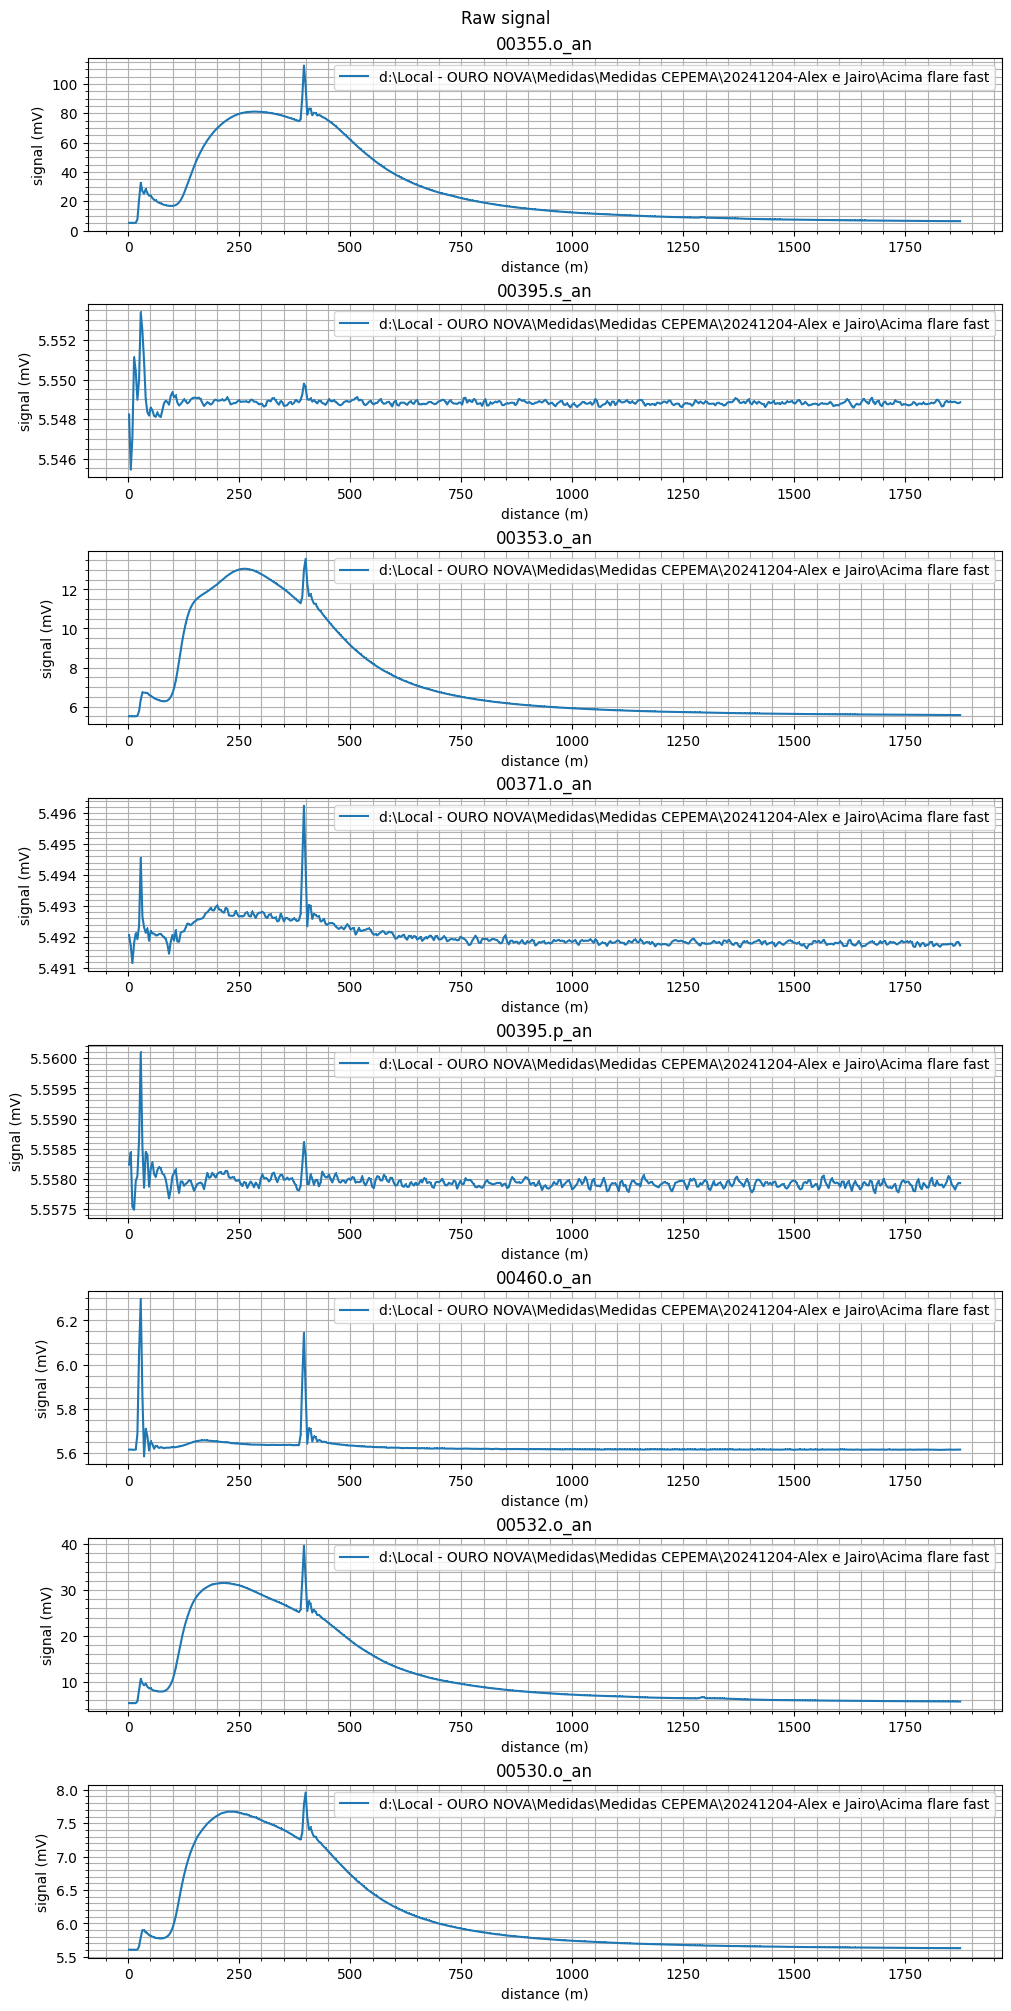

In [20]:
number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=number_traces, figsize=(10,20), layout='constrained')
fig.suptitle('Raw signal')
for name, data in measurements_average.items():
    for i,trace in enumerate(measurements_average[name]):
        ax[i].plot(trace[0], trace[1], label=name, marker=',')
        ax[i].set_title(licel_channels_names[i])
        ax[i].grid(True, 'both')
        ax[i].minorticks_on()
        ax[i].set_xlabel('distance (m)')
        ax[i].set_ylabel('signal (mV)')
        ax[i].legend(loc='upper right')

## Save to a file

In [4]:
fig.savefig('atmosfera.png')